In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

In [5]:
import torch
from dcgan import Discriminator, Generator

# Determine the number of GPUs
num_gpu = 1 if torch.cuda.is_available() else 0

# Load the models
D = Discriminator(ngpu=num_gpu).eval()
G = Generator(ngpu=num_gpu).eval()

# Load weights
D_path = 'weights/netD_epoch_299.pth'
G_path = 'weights/netG_epoch_299.pth'

# Specify map_location to load on CPU
if torch.cuda.is_available():
    D.load_state_dict(torch.load(D_path))
    G.load_state_dict(torch.load(G_path))
else:
    D.load_state_dict(torch.load(D_path, map_location=torch.device('cpu')))
    G.load_state_dict(torch.load(G_path, map_location=torch.device('cpu')))

# Move models to GPU if available
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()


# generate some images

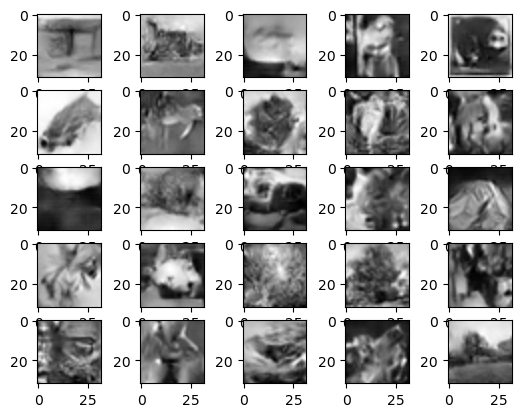

In [6]:
batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)


# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 32, 32)
# fake_images_np = fake_images_np.transpose((0, 2, 3, 1))
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], interpolation='bilinear', cmap='gray')
plt.show()

# run discriminator

In [7]:
outputs = D(fake_images)
print(outputs)

tensor([5.2194e-01, 8.4826e-04, 7.8226e-03, 5.6833e-01, 7.2584e-04, 5.6380e-01,
        6.5299e-02, 1.1335e-03, 4.8688e-02, 8.9001e-04, 1.7729e-02, 1.8969e-01,
        1.4754e-04, 2.4494e-02, 3.4334e-03, 3.8328e-05, 1.7944e-03, 2.8339e-02,
        4.7985e-04, 7.6031e-05, 1.5974e-05, 4.1143e-03, 1.1719e-03, 2.2937e-03,
        9.0237e-02], grad_fn=<SqueezeBackward1>)


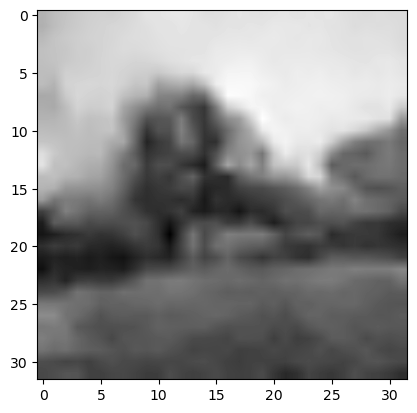

In [8]:
 plt.imshow(fake_images_np[i], interpolation='bilinear', cmap='gray')